In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal, ogr
#import seaborn as sns
%matplotlib inline

In [55]:
def shapethedata(df_DI, df_GT, df_PR, df_ID, landclass = 'veg'):
    """
    input
    output
    """
    if landclass == 'all':
        all_classes = [11,14,20,30,40,50,60,70,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230]
        df_LU_condition = df_LU.T[df_LU.T.isin(all_classes)].dropna().T
    if landclass == 'veg':
        vegetation = [11,14,20,30,40,50,60,70,90,100,110,120,130,140,160,170,180,]
        df_LU_condition = df_LU.T[df_LU.T.isin(vegetation)].dropna().T
    if landclass == 'crop':
        cropland = [11,14]
        df_LU_condition = df_LU.T[df_LU.T.isin(cropland)].dropna().T
    
    #df_LU_condition
    #df_LU.T[(df_LU.T == [11,14])].dropna()#.T

    rs_list = []
    gt_list = []
    pr_list = []
    st_list = []

    for i in df_LU_condition:
        #print i
        ID = i
        df = pd.concat([df_DI[ID], df_GT[ID]], axis=1)    
        df.columns = ['di','gt']
        df['prv'] = pd.Series([df_PR[ID].tolist()[0] for x in range(df.shape[0])], index=df.index)
        df['ID'] = pd.Series([df_ID[ID].tolist()[0] for x in range(df.shape[0])], index=df.index)
        #df.dropna(inplace = True)
        df.fillna(0, inplace=True)   

        # select observations containing 30 or more consecutive drought days
        #df1 = df.loc[df.groupby((~(df.index.to_series().diff() ==  pd.Timedelta(1, unit='d'))
        #                        ).astype(int).cumsum() ).transform(len).iloc[:, 0] >= 30] 

        df1 = df
        
        rs_list = rs_list + df1.ix[:,0].tolist()
        gt_list = gt_list + df1.ix[:,1].tolist()    
        pr_list = pr_list + df1.ix[:,2].tolist()
        st_list = st_list + df1.ix[:,3].tolist()    
        #plt.scatter(df_concat.ix[:,1],df_concat.ix[:,0])
        #plt.xlim(0,4)
        #plt.xticks([1,2,3],['Light','Medium','Heavy'])
    #plt.show()
    # convert to numpy array
    rs_array = np.array(rs_list)
    gt_array = np.array(gt_list)
    pr_array = np.array(pr_list)
    st_array = np.array(st_list)

    # convert to pandas series
    rs_Series = pd.Series(rs_array)
    gt_Series = pd.Series(gt_array)
    pr_Series = pd.Series(pr_array)
    st_Series = pd.Series(st_array)

    df_new = pd.concat([gt_Series, rs_Series, pr_Series, st_Series], axis=1)
    df_new.columns = ['ground-truth','remote-sensing','province','ID']
    df_new.sort('ground-truth', inplace = True)

    np.unique(df_new['province'])
    sel_names = ['Ningxia Hui','Shanxi','Shandong','Gansu','Guangxi','Chongqing']

    df_new_sel = df_new.loc[df_new['province'].isin(sel_names)]
    #df_new_sel.head()
    return df_new_sel

In [3]:
def setBoxColors(bp, bp_col = 1):
    if bp_col == 1:
        plt.setp(bp['boxes'], color="#2C7BB6", linewidth=2)
        #plt.setp(bp['caps'][0], color="#2C7BB6", linewidth=2)
        plt.setp(bp['caps'], color="#2C7BB6", linewidth=2)
        #plt.setp(bp['whiskers'][0], color="#2C7BB6", linestyle='-', linewidth=2)
        plt.setp(bp['whiskers'], color="#2C7BB6", linestyle='-', linewidth=2)
        #plt.setp(bp['fliers'][0], color="#2C7BB6", linewidth=2)
        plt.setp(bp['fliers'], color="#2C7BB6", linewidth=2)
        plt.setp(bp['medians'], color="#2C7BB6", linewidth=2)

    if bp_col == 2:
        plt.setp(bp['boxes'], color='#FF6600', linewidth=2)
        #plt.setp(bp['caps'][2], color='#FF6600', linewidth=2)
        plt.setp(bp['caps'], color='#FF6600', linewidth=2)
        #plt.setp(bp['whiskers'][2], color='#FF6600', linestyle='--', linewidth=2)
        plt.setp(bp['whiskers'], color='#FF6600', linestyle='-', linewidth=2)
        #plt.setp(bp['fliers'][2], color='#FF6600', linewidth=2)
        plt.setp(bp['fliers'], color='#FF6600', linewidth=2)
        plt.setp(bp['medians'], color='#FF6600', linewidth=2)

In [4]:
df_LU = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//RS_LANDUSE.pkl')
df_GT = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//groundtruth_2003_2013.pkl')
df_PR = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//GT_Province.pkl')
df_ID = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//GT_StationID.pkl')

In [118]:
#df_DI_VHI = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//RS_VHI2_2003_2013.pkl')
#df_DI_VCI = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//RS_VCI_2003_2013.pkl')
df_DI_TCI = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//RS_TCI_2003_2013.pkl')

In [119]:
#df_DI_NDAI = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//RS_NDAI_2003_2013.pkl')
#df_DI_NVAI = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//RS_NVAI_2003_2013.pkl')
df_DI_NTAI = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//RS_NTAI_2003_2013.pkl')

In [117]:
df_DI_NVAI = None
df_DI_VCI = None

In [120]:
df_first = shapethedata(df_DI_TCI, df_GT, df_PR, df_ID, landclass = 'all')
df_second = shapethedata(df_DI_NTAI, df_GT, df_PR, df_ID, landclass = 'all')
#label_first = 'VCI'
#label_second = 'NVAI'
#label_landuse = 'cropland'
#label_landuse = 'vegetated area'
#label_landuse = 'China'

D:\Python27x64\lib\site-packages\ipykernel\__main__.py:62: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [110]:
boxes_first = []
boxes_second = []

labels_first = []
labels_second = []

positions_first = []
positions_second = []

In [121]:
boxes_first.append(df_first[df_first['ground-truth']>=1]['remote-sensing'].as_matrix()/1000)
boxes_second.append((df_second[df_second['ground-truth']>=1]['remote-sensing'].as_matrix()/1000)-1)

labels_first.append('TCI')
labels_second.append('NTAI')

positions_first.append(3)
positions_second.append(4)

In [148]:
from itertools import chain
l = [list(a) for a in zip(labels_first, labels_second)]
labels = list(chain.from_iterable(l))

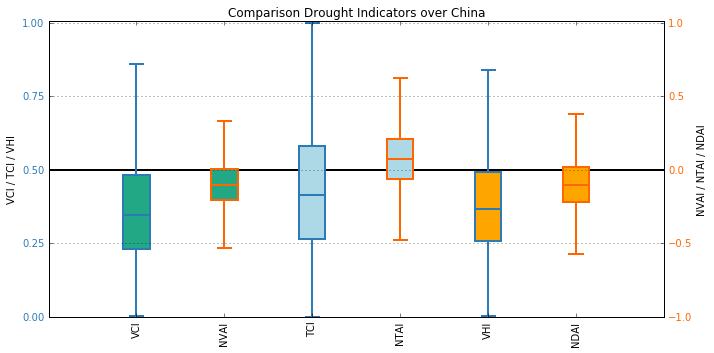

In [194]:
cl_boxes = ['orange','#22A884', 'lightblue']
fig, ax1 = plt.subplots(figsize=(10,5))    
ax2 = ax1.twinx()
ax1.hlines(0.5, 0, 7, linewidth = 2, zorder = 0)
bp = ax1.boxplot(boxes_first, positions = positions_first,#, labels=labels_first,
                 widths= 0.3, sym = '', patch_artist = True)
setBoxColors(bp, bp_col = 1)
for idx, val in enumerate(bp['boxes']):
    plt.setp(val, facecolor = cl_boxes[idx])
for tl in ax1.get_yticklabels():
    tl.set_color("#2C7BB6")

bp = ax2.boxplot(boxes_second, positions = positions_second, 
                widths= 0.3, sym = '', patch_artist = True)
setBoxColors(bp, bp_col = 2)
for idx, val in enumerate(bp['boxes']):
    plt.setp(val, facecolor = cl_boxes[idx])
for tl in ax2.get_yticklabels():
    tl.set_color('#FF6600')

ax1.set_ylim(-0.0,1.005)
ax1.set_yticks([0,0.25,0.5,0.75,1.0])
ax2.set_ylim(-1.00,1.01)
ax1.set_ylabel('VCI / TCI / VHI')
ax2.set_ylabel('NVAI / NTAI / NDAI')

ax1.set_xticks(range(1,20))
ax1.set_xticklabels(labels, rotation=90)

plt.xlim(0,7)
plt.grid()
plt.title('Comparison Drought Indicators over China')
plt.tight_layout()

plt.savefig(r'D:\Data\NDAI_VHI_GROUNDTRUTH\png//comp_DI_china.png', dpi=200)

In [156]:
labels = ['VCI', 'NVAI', 'TCI', 'NTAI', 'VHI', 'NDAI']

In [300]:
boxes_first[2]

array([ 0.48033333,  0.48544444,  0.48466667, ...,  0.33311111,
        0.32711111,  0.36622222])

In [298]:
tci_in

array([ 0.48033333,  0.48544444,  0.48466667, ...,  0.33311111,
        0.32711111,  0.36622222])

In [337]:
tci_in = boxes_first[1]
ntai_in = boxes_second[1]

In [338]:
df_tci_ntai = pd.DataFrame([tci_in,ntai_in]).T
df_tci_ntai.columns = ['tci','ntai']
df_tci_ntai.dropna(inplace=True)

In [339]:
x = df_tci_ntai['tci'].as_matrix()
y = df_tci_ntai['ntai'].as_matrix()

In [268]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

D:\Python27x64\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


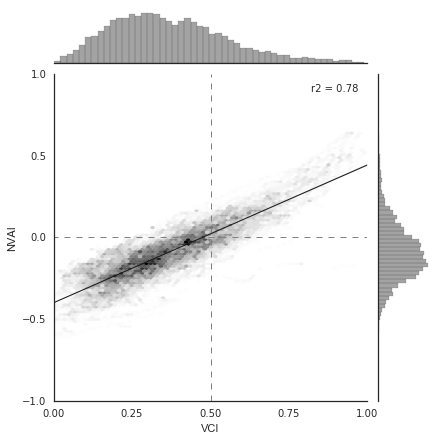

In [340]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

with sns.axes_style("white"):
    ax = sns.jointplot(x=x, y=y, kind="hex", color="k", xlim=(0,1), ylim=(-1,1), #gridsize=20,
                       size=6, stat_func=r2);
    rg = sns.regplot(x, y, ax=ax.ax_joint, scatter=False, color='k', line_kws={"linewidth": 1},)    

#ax.x.data.axes.set_xticks([0,0.25,0.5,0.75,1])

ax.ax_joint.set_xticks([0,0.25,0.5,0.75,1])
ax.ax_joint.hlines(0,-1,1,linestyle='--', zorder=1, linewidth=1, color='gray')
ax.ax_joint.vlines(0.5,-1,1,linestyle='--', zorder=1, linewidth=1, color='gray')
ax.set_axis_labels('VCI','NVAI')


ax.savefig(r'D:\Data\NDAI_VHI_GROUNDTRUTH\png//comp_NVAI_VCI_china.png', dpi=200)

In [279]:
import scipy.stats as st_ft

In [ ]:
st_ft.

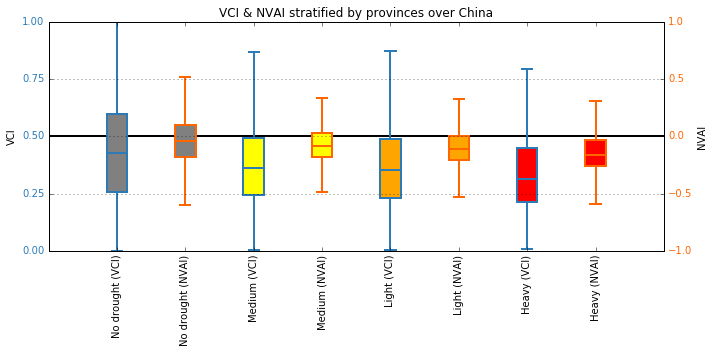

In [73]:
# PREPARE THE DATA
# LEFT AXIS
ax1_counter = 0
ax1_boxes = []
ax1_labels = []
ax1_positions = []
for key, grp in df_first.groupby('ground-truth'):
    if key == 0:
        key = 'No drought'
    if key == 1:
        key = 'Medium'
    if key == 2:
        key = 'Light'
    if key == 3:
        key = 'Heavy'
    ax1_labels.append(key+' ('+label_first+')')
    ax1_boxes.append((grp['remote-sensing']/1000).as_matrix())
    ax1_positions.append(ax1_counter)
    ax1_counter += 2

# RIGHT AXIS    
ax2_counter = 1
ax2_boxes = []
ax2_labels = []
ax2_positions = []
for key, grp in df_second.groupby('ground-truth'):
    if key == 0:
        key = 'No drought'
    if key == 1:
        key = 'Medium'
    if key == 2:
        key = 'Light'
    if key == 3:
        key = 'Heavy'    
    ax2_labels.append(key+' ('+label_second+')')
    #ax2_boxes.append(grp['remote-sensing'].as_matrix())
    ax2_boxes.append(((grp['remote-sensing']/1000)-1).as_matrix())
    ax2_positions.append(ax2_counter)
    ax2_counter += 2  

from itertools import chain
l = [list(a) for a in zip(ax1_labels, ax2_labels)]
labels = list(chain.from_iterable(l))   

# PLOT THE DATA    
cl_boxes = ['#440154','#414487', '#2A788E', '#22A884', '#7AD151', '#FDE725']
cl_boxes = ['gray','yellow', 'orange', 'red']

fig, ax1 = plt.subplots(figsize=(10,5))    
ax2 = ax1.twinx()

bp = ax1.boxplot(ax1_boxes, positions=ax1_positions, labels=ax1_labels, 
                 widths= 0.3, sym = '', patch_artist = True)
setBoxColors(bp, bp_col = 1)
for idx, val in enumerate(bp['boxes']):
    plt.setp(val, facecolor = cl_boxes[idx])
for tl in ax1.get_yticklabels():
    tl.set_color("#2C7BB6")

bp = ax2.boxplot(ax2_boxes, positions=ax2_positions, 
                 widths= 0.3, sym = '', patch_artist = True)
setBoxColors(bp, bp_col = 2)
for idx, val in enumerate(bp['boxes']):
    plt.setp(val, facecolor = cl_boxes[idx])
for tl in ax2.get_yticklabels():
    tl.set_color('#FF6600')

ax1.set_ylim(0,1)
ax1.set_yticks([0,0.25,0.5,0.75,1.0])
ax1.set_ylabel(label_first)
ax2.set_ylim(-1,1)
ax2.set_ylabel(label_second)
ax1.hlines(0.5, -1,12, zorder=0, linewidth=2)

ax1.set_xticks(range(0,20))
ax1.set_xticklabels(labels, rotation=90)

ax2.set_xticks(range(0,20))
ax2.set_xticklabels(labels, rotation=90)

plt.xlim(-1,8)
plt.grid()
plt.title(label_first+' & '+label_second+' stratified by provinces over '+label_landuse)
#plt.minorticks_on()
plt.legend(loc='best')
plt.tight_layout()
plt.savefig(r'D:\Data\NDAI_VHI_GROUNDTRUTH\png//'+label_first+'_'+label_second+'_severity_'+label_landuse+'.png', dpi=200)
plt.show()

In [ ]:
'''
Make a colorbar as a separate figure.
'''

from matplotlib import pyplot
import matplotlib as mpl

# Make a figure and axes with dimensions as desired.
fig = pyplot.figure(figsize=(8, 3))

ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

# The third example illustrates the use of custom length colorbar
# extensions, used on a colorbar with discrete intervals.
cmap = plt.cm.viridis
                     
#cmap.set_over((1., 0., 0.))
#cmap.set_under((0., 0., 1.))

bounds = range(0,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap,
                                norm=norm,
                                #boundaries=[-10] + bounds + [10],
                                #extend='both',
                                # Make the length of each extension
                                # the same as the length of the
                                # interior colors:
                                extendfrac='auto',
                                ticks=bounds,
                                spacing='uniform',
                                orientation='horizontal')
cb3.set_label('Custom extension lengths, some other units')

pyplot.show()

In [ ]:
import matplotlib as mpl

In [ ]:
print 'unique stations', len(np.unique(df_new['ID']))
print 'observations', df_new.shape

df_new_mi = df_new.set_index(['province','ID'])

pr_name_list = []
pr_uniquestations_list = []
for prov in df_new_mi.index.levels[0]:
    pr_name_list.append(prov)
    pr_uniquestations_list.append(len(np.unique(df_new_mi.ix[prov].index)))
    
df_unique_stations = pd.DataFrame(pr_uniquestations_list, index = pr_name_list, columns=['unique stations'])    
df_unique_stations

from collections import Counter
count_pr = Counter(df_new['province'].tolist()).most_common()

pr_unqna_list = []
pr_unqva_list = []
for i in range(len(count_pr)):
    pr_unqna_list.append(count_pr[i][0])
    pr_unqva_list.append(count_pr[i][1])    

df_stations = pd.DataFrame(pr_unqva_list, index=pr_unqna_list, columns=['total observations'])
df_stations.head()

df_to_us = pd.concat((df_stations,df_unique_stations), axis=1).sort(['unique stations'], ascending=False)
df_to_us.to_csv(r'D:\Data\NDAI_VHI_GROUNDTRUTH\csv//total_unique_vegetation.csv')

df_area = pd.Series([140000,82300,454000,236660,174000,33940,187700,469000,167000,185900,212000,166600,187400,146000,1200000,66400,720000,205600,156700,156000,487700,394000,101800],index=np.unique(df_new['province']))
df_area_stations = pd.concat([df_stations,df_area], join='inner', axis=1)
df_area_stations.columns = ['stations', 'area']
df_area_stations.head()

df_sel = df_area_stations['stations']/df_area_stations['area']*1000
sel_names = df_sel[df_sel>=1].index

In [ ]:
plt.boxplot(grp['remote-sensing'].as_matrix(),positions=[8])
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.boxplot((df_new_sel['remote-sensing'])/1000, groupby=df_new_sel['province'], fliersize=0.1)
for item in ax.get_xticklabels():
    item.set_rotation(45)
title = 'VHI vs CMA'
ylabel = 'VHI'
ax.set_ylim(0,1)
ax.set_title(title)
ax.set_ylabel(ylabel)
plt.tight_layout()
#plt.savefig(r'C:\Users\lenovo\Desktop//'+title+'.png', dpi=200)

In [ ]:
plt.figure(figsize=(10,5))
# define outlier properties
flierprops = dict(marker='o', markersize=5, color='k')
ax = sns.boxplot((df_new_sel['remote-sensing'])/1000, groupby=df_new_sel['ground-truth'], fliersize=5,
                flierprops=flierprops)
for item in ax.get_xticklabels():
    item.set_rotation(45)
title = 'VHI vs CMA'
ylabel = 'VHI'
ax.set_ylim(0,1)
ax.set_title(title)
ax.set_ylabel(ylabel)
plt.tight_layout()
#plt.savefig(r'C:\Users\lenovo\Desktop//'+title+'.png', dpi=200)

In [ ]:
df_stations.head()

In [ ]:
sel_names[0]

In [ ]:
ax = sns.boxplot(df_new['remote-sensing'], groupby=df_new['ground-truth'])
ax.set_xticklabels(['light', 'medium','heavy'])
ax.set_title('NDAI vs CMA')

In [ ]:
df = df_concat[df_concat['gt']>0]

In [ ]:
%%timeit
row_labels = df.index[(df.index.to_series() - df.index.to_series().shift(2)) == pd.Timedelta(2, unit='d')]
rows = [x - pd.Timedelta(n, unit='d') for n in range(0,3) for x in row_labels]
rows = sorted(rows)
df1 = df.loc[rows].groupby(df.loc[rows].index).first()

In [ ]:
idx = pd.DatetimeIndex(['2003-04-10', '2003-04-11', '2003-04-12', '2003-04-13','2003-04-17','2003-05-02', '2003-05-03', '2003-05-04','2003-07-23', '2003-07-24'])
df = pd.DataFrame(np.random.random((10,2)),index=idx)
df

In [ ]:
row_labels = df.index[(df.index.to_series() - df.index.to_series().shift(2)) == pd.Timedelta(2, unit='d')]
rows = [x - pd.Timedelta(n, unit='d') for n in range(0,3) for x in row_labels]
rows = sorted(rows)
df.loc[rows].drop_duplicates()